380
11


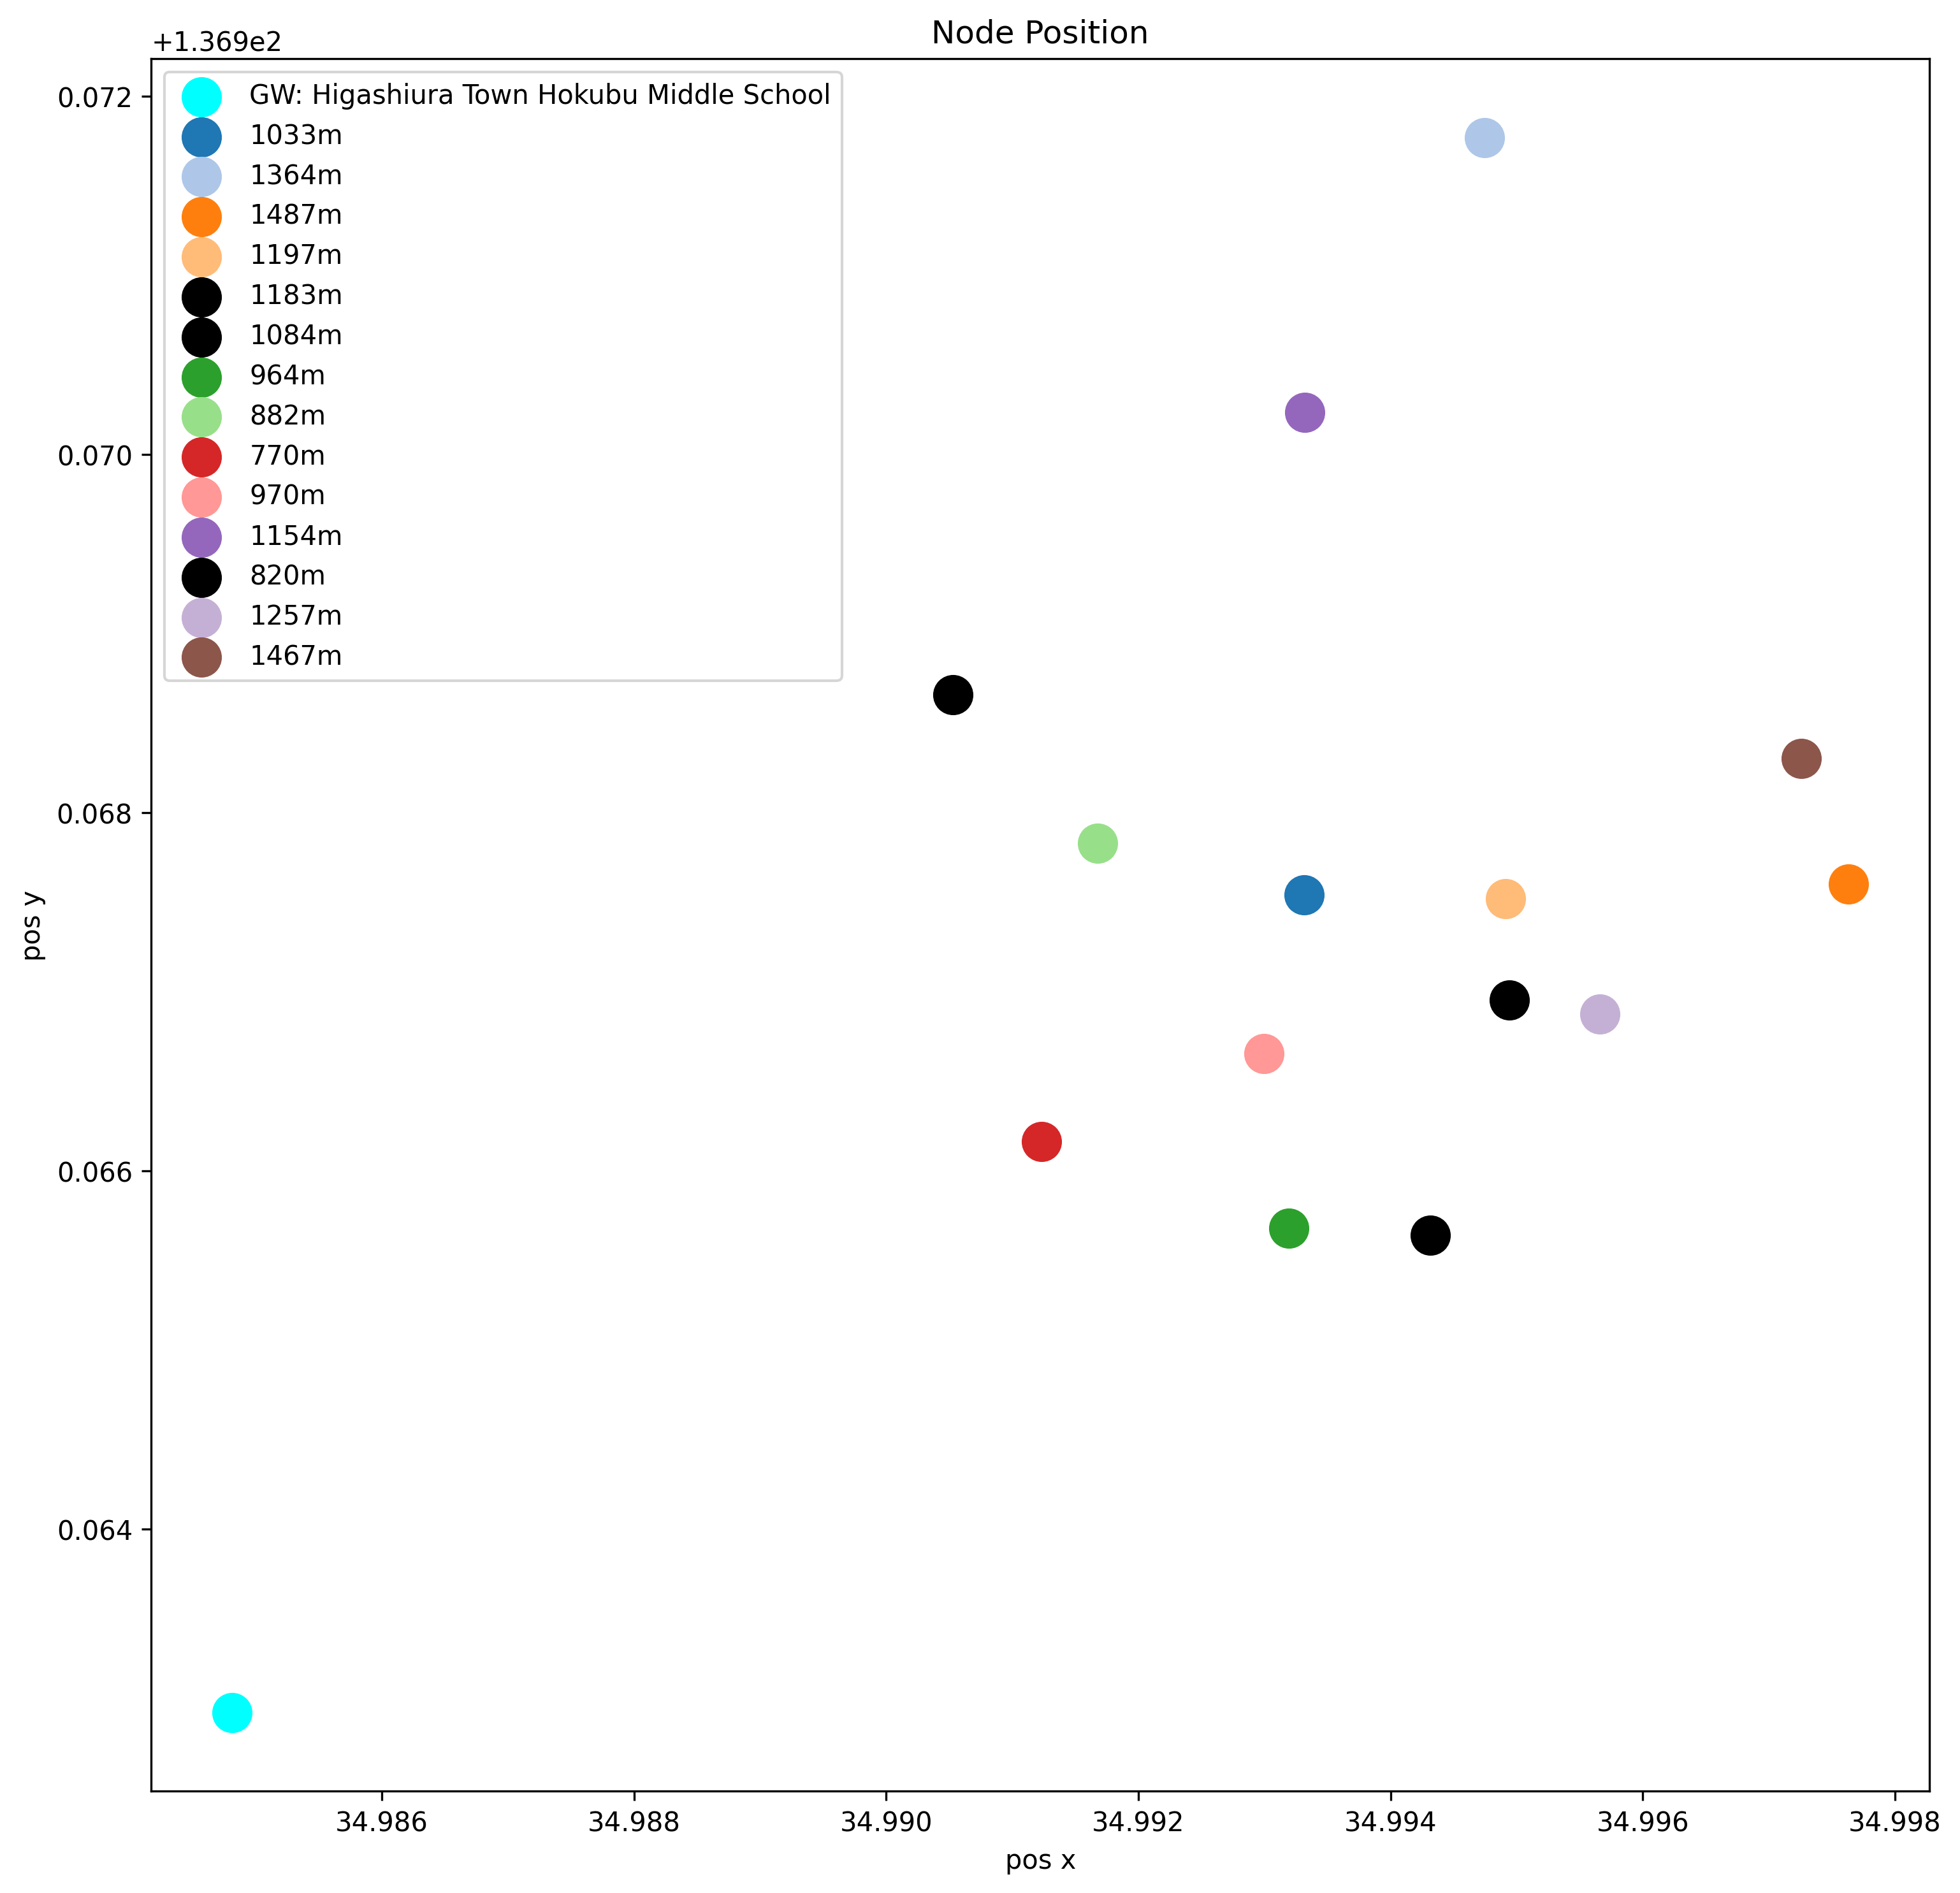

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import dataclasses
import copy
import datetime
import matplotlib.patches as patches
from math import sin, cos, sqrt, atan2, radians

@dataclasses.dataclass
class GarbageBox:
    id: str
    latitude: float
    longitude: float
    burnable: bool
    incombustible: bool
    resource: bool


@dataclasses.dataclass
class LoRaWANGateway:
    latitude: float
    longitude: float

def HasItBox(value:str):
    if value == "○":
        return True
    else:
        return False

def CountBoxes(box:GarbageBox) -> int:
    cnt:int = 0
    if box.burnable:      cnt = cnt+1
    if box.incombustible: cnt = cnt+1
    if box.resource:      cnt = cnt+1
    return cnt

csv_file = "/Users/tozastation/workspace/tozastation/simulate-lorawan/garbage_box_location.csv"
garbage_boxes = []
garbage_box_csv = pd.read_csv(csv_file)

for index, row in garbage_box_csv.iterrows():
    box = GarbageBox(
        row[0], 
        round(float(row[1]), 6),
        round(float(row[2]), 6),
        HasItBox(row[3]),
        HasItBox(row[4]),
        HasItBox(row[5])
    )
    garbage_boxes.append(box)

# ----
fig_p = plt.figure(figsize=(12, 12), dpi=300)
ax_p = fig_p.add_subplot(111)
ax_p.set_title("Node Position")
ax_p.set_xlabel("pos x")
ax_p.set_ylabel("pos y")
# --- Gateway ---
# gw_a = LoRaWANGateway(34.969587, 136.924443) # 東浦町立卯ノ里小学校
# gw_b = LoRaWANGateway(34.953981, 136.962864) # 愛知県立東浦高
gw_c = LoRaWANGateway(34.984811, 136.962978)   # 東浦町立北部中学校
ax_p.scatter(gw_c.latitude, gw_c.longitude, color='aqua', label='GW: Higashiura Town Hokubu Middle School', s=200)
# plot coverage
# --- Node ---
cmap = plt.get_cmap("tab20")
print(len(garbage_boxes))
cnt = 0
lat1 = radians(34.984811)
lon1 = radians(136.962978)
R = 6373.0
new_location = []
for i, garbage_box in enumerate(garbage_boxes):
    latitude    = garbage_box.latitude
    longitude   = garbage_box.longitude
    cnt_box     = CountBoxes(garbage_box)
    if (latitude < 34.99) or (longitude < 136.965):
        continue
    else:
        new_location.append((latitude, longitude))
        lat2 = radians(latitude) # 34.994744,136.971769
        lon2 = radians(longitude)
        dlon = lon2 - lon1
        dlat = lat2 - lat1
        a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
        c = 2 * atan2(sqrt(a), sqrt(1 - a))
        distance = round(R * c, 4) * 1000
        if cnt_box == 1:
            ax_p.scatter(latitude, longitude, color="black", label=str(int(distance))+"m", s=200)
        else:
            ax_p.scatter(latitude, longitude, color=cmap(cnt), label=str(int(distance))+"m", s=200)
            cnt = cnt + 1

#   
print(cnt)
ax_p.legend(loc='upper left')
# ax_p.grid(True)
# write file
file_prefix = datetime.datetime.now().isoformat()
file_name = "garbage_box_location.png"
fig_p.savefig("/Users/tozastation/workspace/tozastation/simulate-lorawan/" + file_name)

In [101]:
import numpy as np
import os
import pandas as pd
import dataclasses
import copy
import csv

@dataclasses.dataclass
class GarbageBox:
    id: str
    latitude: float
    longitude: float
    burnable: bool
    incombustible: bool
    resource: bool


@dataclasses.dataclass
class LoRaWANGateway:
    latitude: float
    longitude: float

def HasItBox(value:str):
    if value == "○":
        return True
    else:
        return False

def ConvertToPict(value:bool) -> int:
    if value == True:
        return 1
    else:
        return 0

def CountBoxes(box:GarbageBox) -> int:
    cnt:int = 0
    if box.burnable:      cnt = cnt+1
    if box.incombustible: cnt = cnt+1
    if box.resource:      cnt = cnt+1
    return cnt

csv_file = "/Users/tozastation/workspace/tozastation/simulate-lorawan/garbage_box_location.csv"
garbage_boxes = []
garbage_box_csv = pd.read_csv(csv_file)

for index, row in garbage_box_csv.iterrows():
    box = GarbageBox(
        row[0], 
        round(float(row[1]), 6),
        round(float(row[2]), 6),
        HasItBox(row[3]),
        HasItBox(row[4]),
        HasItBox(row[5])
    )
    garbage_boxes.append(box)

file_name = "limited_garbage_box_location.csv"
file_path = "/Users/tozastation/workspace/tozastation/simulate-lorawan/" + file_name
with open(file_path, 'w') as f:
    writer = csv.writer(f)
    for i, garbage_box in enumerate(garbage_boxes):
        cnt:int = CountBoxes(garbage_box)
        latitude  = garbage_box.latitude
        longitude = garbage_box.longitude
        if (latitude < 34.99) or (longitude < 136.965):
            continue
        else: 
            writer.writerow([
                garbage_box.id,
                garbage_box.latitude,
                garbage_box.longitude,
                ConvertToPict(garbage_box.burnable),
                ConvertToPict(garbage_box.incombustible),
                ConvertToPict(garbage_box.resource)
            ])


In [134]:
import numpy as np
import os
import pandas as pd
import dataclasses
import copy
import csv
from math import sin, cos, sqrt, atan2, radians

@dataclasses.dataclass
class GarbageBox:
    id: str
    latitude: float
    longitude: float
    burnable: bool
    incombustible: bool
    resource: bool


@dataclasses.dataclass
class LoRaWANGateway:
    latitude: float
    longitude: float

@dataclasses.dataclass
class BetweenGarbageBoxDistance:
    iam: GarbageBox
    distance_map: [(float,GarbageBox)]

def HasItBox(value:int):
    if value == 1:
        return True
    else:
        return False

def removeDuplicates(lst): 
    return [t for t in (set(tuple(i) for i in lst))] 

csv_file = "/Users/tozastation/workspace/tozastation/simulate-lorawan/limited_garbage_box_location.csv"
garbage_boxes = []
garbage_box_csv = pd.read_csv(csv_file)

for index, row in garbage_box_csv.iterrows():
    box = GarbageBox(
        row[0], 
        round(float(row[1]), 6),
        round(float(row[2]), 6),
        HasItBox(row[3]),
        HasItBox(row[4]),
        HasItBox(row[5])
    )
    garbage_boxes.append(box)

items = []
for i, garbage_box in enumerate(garbage_boxes):
    lat1 = radians(garbage_box.latitude) # 34.993315,136.967541
    lon1 = radians(garbage_box.longitude)
    item = BetweenGarbageBoxDistance(garbage_box, [])
    for j, g_box in enumerate(garbage_boxes):
        if (i!=j): 
            lat2 = radians(g_box.latitude) # 34.994744,136.971769
            lon2 = radians(g_box.longitude)
            dlon = lon2 - lon1
            dlat = lat2 - lat1
            a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
            c = 2 * atan2(sqrt(a), sqrt(1 - a))
            distance = round(R * c, 4)
            if AVAILABLE_DISTANCE > distance:
                item.distance_map.append((distance,g_box))
    items.append(item)

#print(items[0])
AVAILABLE_DISTANCE=0.3 # 300m
shortest_distances = []
for item in items:
    for d_map in sorted(item.distance_map):
        print(item.iam.id, d_map[0], d_map[1].id)
        shortest_distances.append((item.iam.id,d_map[0]))
        break

shortest_distances = sorted(shortest_distances)
pair_node = []
i=0
for i, d1 in enumerate(shortest_distances):
    for j, d2 in enumerate(shortest_distances):
        if(d1[1]==d2[1] and i != j):
            pair_node.append((d1[0],d2[0]))
            break

origin_set = pair_node

file_name = "grouping.csv"
file_path = "/Users/tozastation/workspace/tozastation/simulate-lorawan/" + file_name
with open(file_path, 'w') as f:
    writer = csv.writer(f)
    for i, pair in enumerate(origin_set):
        writer.writerow(list(pair))

GS003 0.2113 GS025
GS004 0.0761 GS028
GS005 0.0519 GS013
GS013 0.0519 GS005
GS014 0.1247 GS021
GS021 0.0913 GS024
GS022 0.1483 GS026
GS023 0.1595 GS022
GS024 0.0913 GS021
GS025 0.2113 GS003
GS026 0.1483 GS022
GS027 0.0802 GS013
GS028 0.0761 GS004


In [47]:
from math import sin, cos, sqrt, atan2, radians

# approximate radius of earth in km
R = 6373.0

lat1 = radians(34.993315) # 34.993315,136.967541
lon1 = radians(136.967541)
lat2 = radians(34.994744) # 34.994744,136.971769
lon2 = radians(136.971769)

dlon = lon2 - lon1
dlat = lat2 - lat1

a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
c = 2 * atan2(sqrt(a), sqrt(1 - a))

distance = R * c

print("Result: ", distance * 1000, "m")

Result:  416.75959683737676 m


380
11


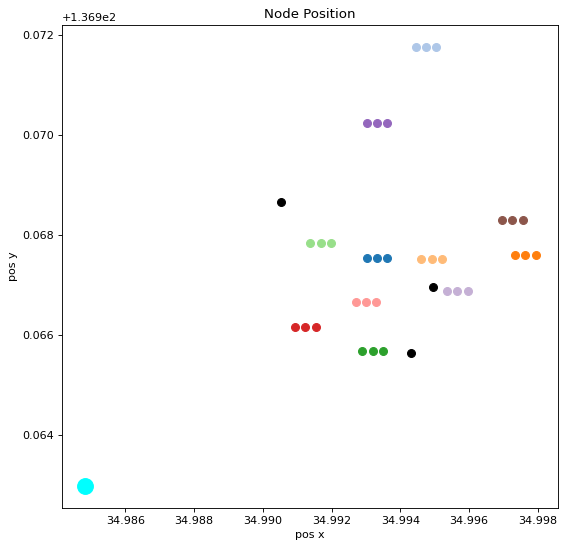

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import dataclasses
import copy
import datetime
import matplotlib.patches as patches
from math import sin, cos, sqrt, atan2, radians

@dataclasses.dataclass
class GarbageBox:
    id: str
    latitude: float
    longitude: float
    burnable: bool
    incombustible: bool
    resource: bool


@dataclasses.dataclass
class LoRaWANGateway:
    latitude: float
    longitude: float

def HasItBox(value:str):
    if value == "○":
        return True
    else:
        return False

def CountBoxes(box:GarbageBox) -> int:
    cnt:int = 0
    if box.burnable:      cnt = cnt+1
    if box.incombustible: cnt = cnt+1
    if box.resource:      cnt = cnt+1
    return cnt

csv_file = "/Users/tozastation/workspace/tozastation/simulate-lorawan/garbage_box_location.csv"
garbage_boxes = []
garbage_box_csv = pd.read_csv(csv_file)

for index, row in garbage_box_csv.iterrows():
    box = GarbageBox(
        row[0], 
        round(float(row[1]), 6),
        round(float(row[2]), 6),
        HasItBox(row[3]),
        HasItBox(row[4]),
        HasItBox(row[5])
    )
    garbage_boxes.append(box)

# ----
fig_p = plt.figure(figsize=(8, 8), dpi=80)
ax_p = fig_p.add_subplot(111)
ax_p.set_title("Node Position")
ax_p.set_xlabel("pos x")
ax_p.set_ylabel("pos y")
# --- Gateway ---
# gw_a = LoRaWANGateway(34.969587, 136.924443) # 東浦町立卯ノ里小学校
# gw_b = LoRaWANGateway(34.953981, 136.962864) # 愛知県立東浦高
gw_c = LoRaWANGateway(34.984811, 136.962978)   # 東浦町立北部中学校
ax_p.scatter(gw_c.latitude, gw_c.longitude, color='aqua', label='GW: Higashiura Town Hokubu Middle School', s=200)
# plot coverage
# --- Node ---
cmap = plt.get_cmap("tab20")
print(len(garbage_boxes))
cnt = 0
lat1 = radians(34.984811)
lon1 = radians(136.962978)
R = 6373.0
new_location = []
for i, garbage_box in enumerate(garbage_boxes):
    latitude    = garbage_box.latitude
    longitude   = garbage_box.longitude
    cnt_box     = CountBoxes(garbage_box)
    if (latitude < 34.99) or (longitude < 136.965):
        continue
    else:
        new_location.append((latitude, longitude))
        lat2 = radians(latitude) # 34.994744,136.971769
        lon2 = radians(longitude)
        dlon = lon2 - lon1
        dlat = lat2 - lat1
        a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
        c = 2 * atan2(sqrt(a), sqrt(1 - a))
        distance = round(R * c, 4) * 1000
        if cnt_box == 1:
            ax_p.scatter(latitude, longitude, color="black", label=str(int(distance))+"m", s=50)
        else:
            ax_p.scatter(latitude + 0.0003, longitude, color=cmap(cnt), label=str(int(distance))+"m", s=50)
            ax_p.scatter(latitude, longitude, color=cmap(cnt), label=str(int(distance))+"m", s=50)
            ax_p.scatter(latitude - 0.0003, longitude, color=cmap(cnt), label=str(int(distance))+"m", s=50)
            cnt = cnt + 1

#   
print(cnt)
#ax_p.legend(loc='upper left')
# write file
# file_prefix = datetime.datetime.now().isoformat()
# file_name = "garbage_box_location.png"
# fig_p.savefig("/Users/tozastation/workspace/tozastation/simulate-lorawan/" + file_name)